<a href="https://colab.research.google.com/github/jeongmin5o/TimeSeries/blob/main/Time_Series_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Time-Series-With-Python

- 시계열 데이터에서 구조를 찾는 방법
- 상관관계 
- 시계열 데이터에서 계절성, 추세 및 노이즈 감지 그리고 시각화


## Autocorrelation(자기상관)

-시계열 데이터터의 중요한 특징은 그것들의 잠재적인 서열적인 상관성이다. 이번 섹션에서는 이러한 상관성을 분석하고 시각화 하는 것에 목적

1. 자기상관은 시계열과 지연된 자체 복사본 간의 상관 관계를 측정한 것

  예) t1,t2,t3 와  3만큼 지연된 값인 t4,t5,t6

2. 시계열 데이터에서 반복되는 패턴이나 주기적인 신호를 찾는데 사용

+) 시계열 뿐만 아니라 모든 신호에 적용될 수 있음(자기 공분산과 동일한 원리)

3. statsmodels 라는 라이브러리 사용
  : 통계 테스트 및 통계 데이터 탐색을 수행할 뿐만 아니라 다양한 통계 모델을 사용할 수 있음



In [27]:
# 깃헙에서 데이터 불러오기
import pandas as pd
co2_levels = pd.read_csv('https://raw.githubusercontent.com/youssefHosni/Time-Series-With-Python/main/Time%20Series%20Data%20Visualization/co2_levels.csv')

In [ ]:
co2_levels.head(3)

,datestamp,co2
0,1958-03-29,316.1
1,1958-04-05,317.3
2,1958-04-12,317.6


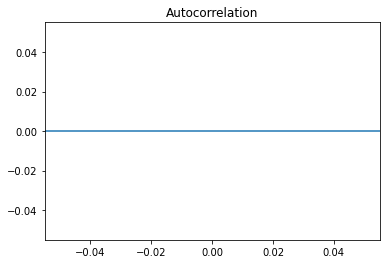

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots

fig = tsaplots.plot_acf(co2_levels['co2'], lags=40)   # plot_acf() 함수를 활용하여 시계열의 자기 상관을 측정하고 플롯
                                                      # lags: 자기 상관 값의 최대 지연 수(시차)


[자기상관 해석]

- 자기상관은 상관 측도이기 떄문에 -1과 1사이의 값만 사용할 수 있음
- 0: 상관관계가 없음
- -1: 강한 음의 상관관계
- 1: 강한 양의 상관관계


- 파란색 음영 영역 = 불확실성의 마진을 계산한 것

- 즉, 파란색 음영 영역 위의 값 : 지연된 버전 자체와의 통계적으로 유의한 관계

## partial autocorreltation ( 부분 자기 상관)

- 시계열과 자신의 지연 버전간의 상관 계수
- 시계열 관측치 값의 상관관계를 측정한 것
- 조건부 자기 상관
- 과거 값 사이의 직접적인 상관관계가 아님
  - **이전 시점의 영향도 제거**하여 아이디어를 확장

  예) 예) t1,t2,t3 와 3만큼 지연된 값인 t4,t5,t6 시차 1과 2에 기인하는 모든 효과를 제거한 후
- 이전 랙의 영향을 고려

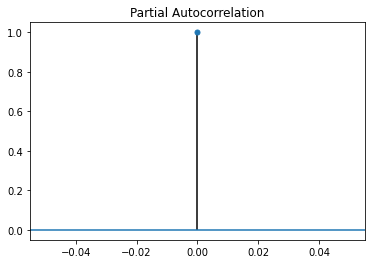

In [ ]:
fig = tsaplots.plot_pacf(co2_levels['co2'], lags = 40)    # 시계열의 처음 40개 시차에 대한 자기 상관

[부분 자기 상관 해석]

- 부분 자기 상관 값이 0에 가까우면 값이 서로 상관되지 않는다.
- 반대로 -1 혹은 1에 가까우면 강한 상관관계를 갖는다.
- 파란색으로 표시된 불확실성 한계를 벗어나면 통계적으로 유의하다고 가정할 수 있음

## Seasonality, trend and noise in time series data

- 계절성, 추세 및 노이즈
- 시계열 데이터를 볼 때, 명확한 패턴이 보임 ( 명확한 상승추세와 주기적인 신호)

< 시계열의 주 구성요소 >

1. 계절성
2. 시간에 따른 증가/감소 추세
3. 시계열의 설명할 수 없는 분산과 변동성을 설명하는 노이즈



time series decomposition (시계열 분해)

: 시계열 데이터의 구조를 자동으로 추출하고 수량화 


In [41]:
co2_levels.info

<bound method DataFrame.info of        datestamp    co2
0     1958-03-29  316.1
1     1958-04-05  317.3
2     1958-04-12  317.6
3     1958-04-19  317.5
4     1958-04-26  316.4
...          ...    ...
2279  2001-12-01  370.3
2280  2001-12-08  370.8
2281  2001-12-15  371.2
2282  2001-12-22  371.3
2283  2001-12-29  371.5

[2225 rows x 2 columns]>

In [19]:
co2_levels.head(5)

,datestamp,co2
0,1958-03-29,316.1
1,1958-04-05,317.3
2,1958-04-12,317.6
3,1958-04-19,317.5
4,1958-04-26,316.4


In [31]:
co2_levels.isnull().sum()

datestamp    0
co2          0
dtype: int64

In [28]:
# co2_levels = co2_levels.dropna(axis=0)

In [44]:
co2_levels['datestamp'] = co2_levels['datestamp'].str.strip()

In [46]:
co2_levels['datestamp'] = co2_levels['datestamp'].astype(str)

In [47]:
co2_levels.head(4)

,datestamp,co2
0,1958-03-29,316.1
1,1958-04-05,317.3
2,1958-04-12,317.6
3,1958-04-19,317.5


In [48]:
import statsmodels.api as sm
from pylab import rcParams # 시계열 분해



rcParams['figure.figsize'] = 11, 9
decomposition = sm.tsa.seasonal_decompose(co2_levels)  # seasonal_decompose: 상대적으로 작은 숫자 반환
                                                              # 출력 수치가 시각화하기에 충분히 큰지 확인
fig = decomposition.plot()  

# 결과값 구성요소 : 계절성, 추세, 노이즈 


# 빌더님 
# period=len(amzn_df_subset)//2
# decomposition = sm.tsa.seasonal_decompose(amzn_df_subset,
# period=len(amzn_df_subset)//2)

ValueError: ignored

In [ ]:
# 시계열 분해 추출
print(dir(decomposition))   # 관련 속성 인쇄
 
print(decomposition.seasonal)   # 이전에 생성된 분해 변수 사용하고 계절 성분 인쇄

seassonality component 

- 계절적 패턴은 시계열이 계절적 요인의 영향을 받을 때 존재

- 계절성은 항상 고정되고 알려진 기간이어야 함

- 예) 온도 : 낮에는 밤보다 항상 따듯 (일별 계절성)

  예) 계절: 겨울에 비해 여름에 항상 따뜻 (월별 계절성)

In [ ]:
decomp_seasonal = decomposition.seasonal


ax = decomp_seasonal.plot(figsize = (14,2))
ax.set_xlabel('date')
ax.set_ylabel('seasonality of time series')
ax.set_titel('seasonal values of the time series')


시계열 분해의 추세값 (Trend component)

- 시계열의 전반적인 진행상황을 반영
- 선형일 필요는 없다.

In [ ]:
decompo_trend = decomposition  # 추세값 추출

ax = decompo_trend.plot(figsize = (14,2))
ax.set_xlabel('Date')
ax.set_ylabel('Trend of time series')
ax.set_title('Trend values of the time series')


노이즈 또는 시계열의 잔여 성분 추출

- 추세나 계절성에 기인할 수 없는 무작위적이고 불규칙한 영향을 설명


In [ ]:
decompo_resid = decompo.resid  # 추세값 추출



ax = decompo_resid.plot(figsize = (14,2))
ax.set_xlabel('Date')
ax.set_ylabel('Residual of time series')
ax.set_title('Residual values of the time series')


주기와 계절성의 차이

- 주기(순환성분): 고정되어있지 않은 빈도. 주기가 상대적으로 길고 일정하지 않은 요인에 의해 나타남.
주기는 알기 어렵기 때문에 분해법에서는 주기를 고려하지 않는다.


- 계절성: 고정된 빈도. 

추세와 주기 그리고 계절성을 확인하는 방법

- 수식
- 수식이 시계열 데이터에서는 더 중요

#   Work with Multiple Time Series 

- 여러 시리즈가 포함된 데이터 세트를 분석하는 방법

In [ ]:
# 깃헙에서 데이터 불러오기
import pandas as pd

meat = pd. read_csv('https://raw.githubusercontent.com/youssefHosni/Time-Series-With-Python/main/Time%20Series%20Data%20Visualization/meat.csv')

In [ ]:
meat.head(5)

,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,1944-01-01,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1,1944-02-01,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
2,1944-03-01,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
3,1944-04-01,650.0,89.0,978.0,66.0,NaN,NaN,NaN
4,1944-05-01,681.0,106.0,1029.0,78.0,NaN,NaN,NaN


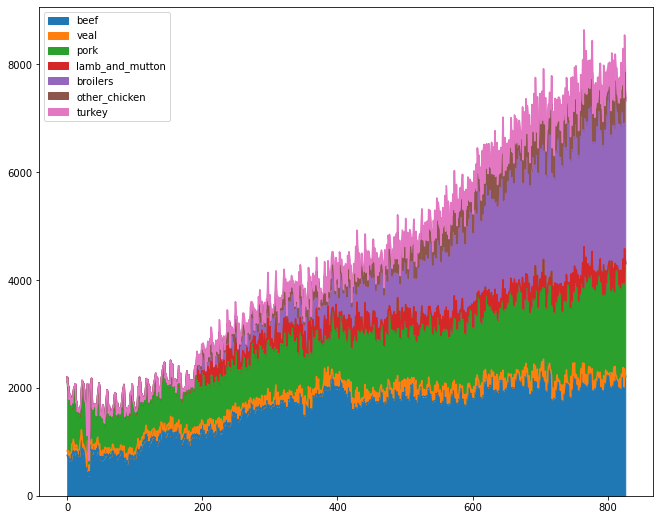

In [ ]:
# area 차트
ax =  meat.plot.area( )

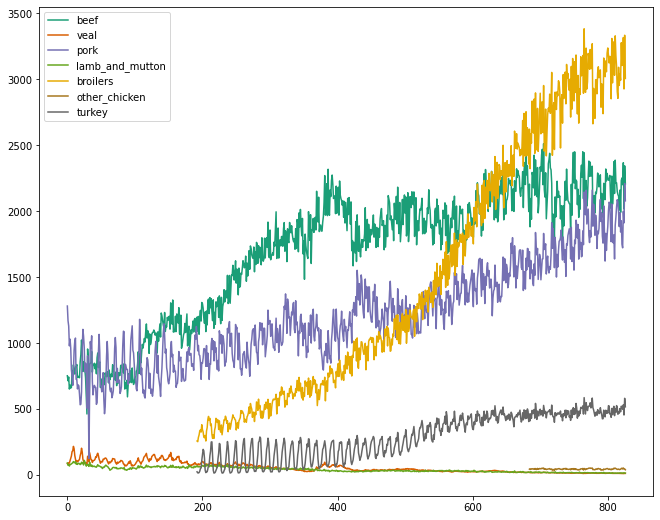

In [ ]:
# colormap


ax = meat.plot(colormap = 'Dark2')

In [ ]:
# 서브플롯
# subplot

meat.plot(subplots = True)  # 여러개로 나누고 싶을 때

# sharex = True : x 축을 공유하는가
# sharey = True : y 축을 공유하는가


상관관계 게산하고 시각화

[ 표준 방법 ] 
변수 x와 y 사이의 상관관계와 P-value값을 모두 바환

1. 피어슨 계수
  - 관심변수간의 관계가 선형이라고 생각할 때 사용

2. 켄달 타우 (Kendall Tau)순위계수
  - 관심변수간의 관계가 비선형이라고 생각할 때 사용

3. 스피어만 (Spearman) 순위계수
  - 관심변수간의 관계가 비비선형이라고 생각할 때 사용

In [ ]:
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
from scipy.stats.stats import kendalltau

x = [1,2,3,4]
y = [1,3,4,8]
pearsonr(x,y)

(0.9647638212377322, 0.03523617876226781)

[ 여러 항목 간의 종속성 조사 _ 상관행렬]

- 각 변수 쌍 간의 상관계수를 포함하는 테이블
- 1과 -1 사이의 값을 사용
- 상관행렬은 항상 '대칭'(c matrix)

- 분산과 공분산이 매우 중요하게 쓰이고 있음
- 고유값 행렬을 찾는데 유용하게 쓰임
- 고유값?





In [ ]:
corr_p = meat[['beef','veal','turkey']].corr(method = 'pearson')
print(corr_p)

            beef      veal    turkey
beef    1.000000 -0.829704  0.738070
veal   -0.829704  1.000000 -0.768366
turkey  0.738070 -0.768366  1.000000


In [ ]:
corr_s = meat[['beef','veal','turkey']].corr(method = 'spearman')
print(corr_s)

            beef      veal    turkey
beef    1.000000 -0.812437  0.778533
veal   -0.812437  1.000000 -0.829492
turkey  0.778533 -0.829492  1.000000


In [ ]:
#모든 시간 사이의 상관관게 계산

corr_meat = meat.corr(method = 'pearson')
print(corr_meat)

                     beef      veal      pork  lamb_and_mutton  broilers  \
beef             1.000000 -0.829704  0.787047        -0.830304  0.748713   
veal            -0.829704  1.000000 -0.808834         0.864955 -0.840392   
pork             0.787047 -0.808834  1.000000        -0.776714  0.920331   
lamb_and_mutton -0.830304  0.864955 -0.776714         1.000000 -0.821316   
broilers         0.748713 -0.840392  0.920331        -0.821316  1.000000   
other_chicken    0.721598  0.072718  0.082029         0.103574  0.516931   
turkey           0.738070 -0.768366  0.835215        -0.764231  0.907887   

                 other_chicken    turkey  
beef                  0.721598  0.738070  
veal                  0.072718 -0.768366  
pork                  0.082029  0.835215  
lamb_and_mutton       0.103574 -0.764231  
broilers              0.516931  0.907887  
other_chicken         1.000000  0.567130  
turkey                0.567130  1.000000  


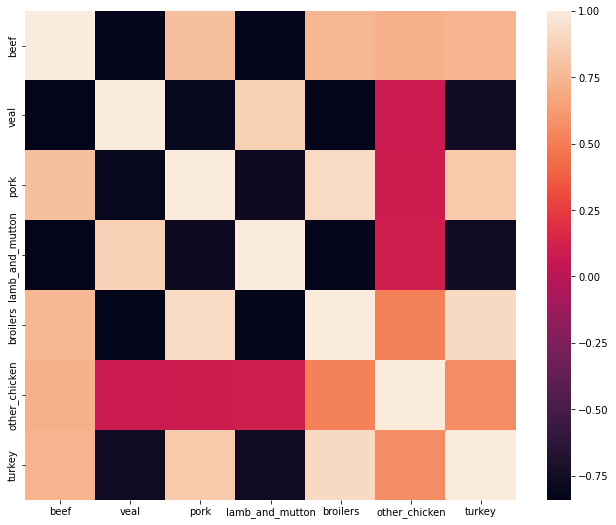

In [ ]:
# 시각화
# heatmap

import seaborn as sns
sns.heatmap(corr_meat)  # 상관관계 직접 나타내기 : annot = True

# 순서가 없으면 읽기 어렵게 만듦

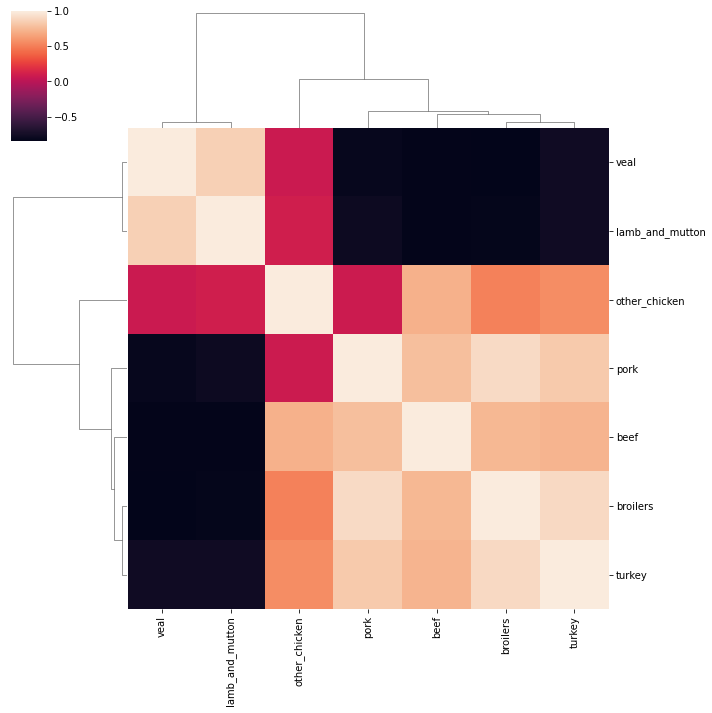

In [ ]:
sns.clustermap(corr_meat)
# 유사한 시계열이 서로 더 가깝게 배치되는 정렬된 히트맵을 표시하는 행렬